In [1]:
%load_ext autoreload
%load_ext line_profiler

In [2]:
%autoreload 

import sys
sys.path.append('../../..')
import pickle

import numpy as np
from tqdm import tqdm_notebook as tqdm

import matplotlib
matplotlib.rc_file('../../matplotlibrc')
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm 
import matplotlib.colors as colors
%matplotlib inline

import darkhistory.physics as phys
import main
import config


Bad key text.latex.preview in file ../../matplotlibrc, line 10 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
%autoreload 

params_list = [{'pri':'phot', 'DM_process':'decay', 
                'mDM':7.2e6, 'inj_param':4e40
            }]

options_dict = {
    'start_rs': 3000, 'high_rs': 1.555e3, 'end_rs':4, 'cross_check':True,
    #'reion_switch':True, 'reion_method':'Puchwein', 'heat_switch':True,
    'reion_switch':False, 'reion_method':'Puchwein', 'heat_switch':False,
    'coarsen_factor':16, 'distort':False, 'fexc_switch': False, 'backreaction':False,
    'reprocess_distortion':False, 'nmax':10, 'rtol':1e-6, 'use_tqdm':True, 'tqdm_jupyter':True, 'iterations':1
}

output_dir = '/scratch/gpfs/hongwanl/DarkHistory/scratch/'

main.embarrassingly_parallel_evolve(
    params_list, 0, options_dict, output_dir, 'max_CMB_no_BR_no_distort_TLA'
)

****** Loading transfer functions... ******
    for propagating photons...   Done!
    for low-energy photons...  Done!
    for low-energy electrons...  Done!
    for high-energy deposition...  Done!
    for total upscattered CMB energy rate...  Done!
****** Loading complete! ******
****** Loading transfer functions... ******
    for inverse Compton (Thomson)...  Done!
    for inverse Compton (relativistic)...  Done!
    for inverse Compton (energy loss)...  Done!
****** Loading complete! ******
cross_check has been set to True -- No longer using all MEDEA               files and no longer using partial-binning.


  0%|          | 0/414.0 [00:00<?, ?it/s]

Successfully produced file:  /scratch/gpfs/hongwanl/DarkHistory/scratch/phot_decay_log10mDM_6.8573_log10param_40.6021_max_CMB_no_BR_no_distort_TLA_ind_0.p


In [6]:
# full_data = pickle.load(open('/scratch/gpfs/hongwanl/DarkHistory/scratch/log10mDM_4.0000_phot_decay_log10param_24.6021_max_CMB_nmax_200_Puchwein_ind_0.p', 'rb'))

old_data = pickle.load(open('/scratch/gpfs/hongwanl/DarkHistory/scratch/phot_decay_log10mDM_6.8573_log10param_24.6021_max_CMB_no_BR_no_distort_TLA_ind_0.p', 'rb'))

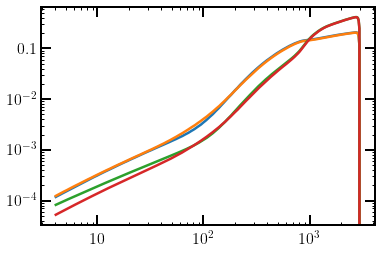

In [7]:
plt.figure()

plt.loglog()

# plt.xscale('log')

rs_vec = old_data['data']['rs']
f_ion_vec = old_data['data']['f']['H ion']
f_heat_vec = old_data['data']['f']['heat']


f_ion_std = phys.f_std(7.2e6, rs_vec, inj_particle='phot', inj_type='decay', channel='H ion')
f_heat_std = phys.f_std(7.2e6, rs_vec, inj_particle='phot', inj_type='decay', channel='heat')


plt.plot(rs_vec, f_ion_vec)
plt.plot(rs_vec, f_ion_std)
plt.plot(rs_vec, f_heat_vec)
plt.plot(rs_vec, f_heat_std)